# W2-Sharks-Clean-Project 

### Importación y carga de Datos

In [1]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  # para quitar warnings
pd.set_option('display.max_columns', None) # muestra todas las columnas del df.head()
#pd.set_option('display.max_rows', None) # muestra todas las columnas del df.head()
data=pd.read_csv('attacks.csv',encoding='windows-1252')

### Cambiar nombre de columnas 

In [3]:
data.columns=[c.replace(' ', '_') for c in data.columns]
data.columns=[c.replace('.', '_') for c in data.columns]
data.columns=[c.replace(':', '') for c in data.columns]
data.columns=[c.replace('/', 'O') for c in data.columns]
data.columns=[c.replace('(', '') for c in data.columns]
data.columns=[c.replace(')', '') for c in data.columns]

### Exploración

In [4]:
data_original = data.shape
data.shape

(25723, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case_Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex_                    5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal_YON               5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species_                3464 non-null 

In [6]:
null_col=data.isnull().sum()
null_col[null_col>0]

Case_Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex_                      19986
Age                       22252
Injury                    19449
Fatal_YON                 19960
Time                      22775
Species_                  22259
Investigator_or_Source    19438
pdf                       19421
href_formula              19422
href                      19421
Case_Number_1             19421
Case_Number_2             19421
original_order            19414
Unnamed_22                25722
Unnamed_23                25721
dtype: int64

### Limpieza de Datos nulos

In [7]:
#¿Qué filas tienen valores nulos y cuántos?
data.isnull().sum(axis=1)

0         2
1         3
2         3
3         4
4         4
         ..
25718    24
25719    24
25720    24
25721    24
25722    23
Length: 25723, dtype: int64

In [8]:
#Eliminar las filas con más de 10 valores nulos y sobreescribir el dataframe 
data = data.drop(data[data.isnull().sum(axis=1) > 10].index)

In [9]:
data.shape

(6302, 24)

In [10]:
#Si no hay valores en Fatal_YON, elimina la fila.
null_fatal=data[data['Fatal_YON'].isna()].index
data.drop(index=null_fatal,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5763 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case_Number             5762 non-null   object 
 1   Date                    5763 non-null   object 
 2   Year                    5762 non-null   float64
 3   Type                    5760 non-null   object 
 4   Country                 5718 non-null   object 
 5   Area                    5359 non-null   object 
 6   Location                5280 non-null   object 
 7   Activity                5344 non-null   object 
 8   Name                    5610 non-null   object 
 9   Sex_                    5276 non-null   object 
 10  Age                     3244 non-null   object 
 11  Injury                  5742 non-null   object 
 12  Fatal_YON               5763 non-null   object 
 13  Time                    2802 non-null   object 
 14  Species_                2948 non-null   

In [11]:
# Si no hay Country, Area y Location, elimina la fila.
null_loc=data[(data['Country'].isna())&(data['Area'].isna())&(data['Location'].isna())].index
data.drop(index=null_loc,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5737 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case_Number             5736 non-null   object 
 1   Date                    5737 non-null   object 
 2   Year                    5736 non-null   float64
 3   Type                    5734 non-null   object 
 4   Country                 5718 non-null   object 
 5   Area                    5359 non-null   object 
 6   Location                5280 non-null   object 
 7   Activity                5325 non-null   object 
 8   Name                    5584 non-null   object 
 9   Sex_                    5252 non-null   object 
 10  Age                     3239 non-null   object 
 11  Injury                  5718 non-null   object 
 12  Fatal_YON               5737 non-null   object 
 13  Time                    2799 non-null   object 
 14  Species_                2943 non-null   

In [12]:
# Si no hay Sex_, elimina la fila.
null_Sex=data[(data['Sex_'].isna())].index
data.drop(index=null_Sex,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5252 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case_Number             5251 non-null   object 
 1   Date                    5252 non-null   object 
 2   Year                    5251 non-null   float64
 3   Type                    5249 non-null   object 
 4   Country                 5234 non-null   object 
 5   Area                    4925 non-null   object 
 6   Location                4849 non-null   object 
 7   Activity                4954 non-null   object 
 8   Name                    5199 non-null   object 
 9   Sex_                    5252 non-null   object 
 10  Age                     3204 non-null   object 
 11  Injury                  5242 non-null   object 
 12  Fatal_YON               5252 non-null   object 
 13  Time                    2708 non-null   object 
 14  Species_                2701 non-null   

In [13]:
#Evaluar que filas no tienen año
data[data['Year']==0]

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex_,Age,Injury,Fatal_YON,Time,Species_,Investigator_or_Source,pdf,href_formula,href,Case_Number_1,Case_Number_2,original_order,Unnamed_22,Unnamed_23
6177,0000.0214,Ca. 214 B.C.,0.0,Unprovoked,NaN,Ionian Sea,NaN,Ascending from a dive,"Tharsys, a sponge diver",M,NaN,"FATAL, shark/s bit him in two",Y,NaN,NaN,"Reported by Greek poet, Leonidas of Tarentum (...",214BC-Tharsys.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0000.0214,0000.0214,126.0,NaN,NaN
6178,0000.0336,Ca. 336.B.C..,0.0,Unprovoked,GREECE,Piraeus,In the haven of Cantharus,Washing his pig in preparation for a religious...,A candidate for initiation,M,NaN,"FATAL, shark ""bit off all lower parts of him u...",Y,NaN,NaN,Plutarch (45 - 125 A.D.) in Life of Phoecion (...,336-BC-Carnathus.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0000.0336,0000.0336,125.0,NaN,NaN
6179,0000.0493,493 B.C.,0.0,Sea Disaster,GREECE,Off Thessaly,NaN,Shipwrecked Persian Fleet,males,M,NaN,Herodotus tells of sharks attacking men in the...,Y,NaN,NaN,Herodotus (485 - 425 B.C.),493BC-PersianFleet.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0000.0493,0000.0493,124.0,NaN,NaN
6180,0000.0725,Ca. 725 B.C.,0.0,Sea Disaster,ITALY,Tyrrhenian Sea,Krater found during excavations at Lacco Ameno...,Shipwreck,males,M,NaN,Depicts shipwrecked sailors attacked by a sha...,Y,NaN,NaN,"V.M. Coppleson (1958), p.262, et al",725BC-vase.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0000.0725,0000.0725,123.0,NaN,NaN
6181,ND-0154,Before 1939,0.0,Unprovoked,CANADA,NaN,Grand Banks,Fishing,Joe Folsom,M,NaN,Arm bitten,N,NaN,NaN,"C.E.Russell, pp. 310-311",ND-0154-Folsom.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0154,ND-0154,122.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


In [14]:
#Los datos no tienen exactitud, los quitamos
no_year=data[data['Year']==0].index
data.drop(index=no_year,inplace=True)

In [15]:
data[data['Location'].isnull()==True]

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex_,Age,Injury,Fatal_YON,Time,Species_,Investigator_or_Source,pdf,href_formula,href,Case_Number_1,Case_Number_2,original_order,Unnamed_22,Unnamed_23
56,2017.12.09,09-Dec-2017,2017.0,Unprovoked,BAHAMAS,NaN,NaN,Snorkeling,Sarah Illig-Carroll,F,25,Minor injury to arm,N,NaN,Nurse shark. 5',"Daily Star, 12/11/2017",2017.12.09-Carroll.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.12.09,2017.12.09,6247.0,NaN,NaN
101,2017.08.18,18-Aug-2017,2017.0,Unprovoked,BAHAMAS,NaN,NaN,Spearfishing,male,M,NaN,Hand injured,N,15h00,5' shark,"CBS12, 8/18/2017",2017.08.18-JupiterDiver.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.08.18,2017.08.18,6202.0,NaN,NaN
110,2017.07.26.R,Reported 26-Jul-2017,2017.0,Unprovoked,BAHAMAS,40 miles off Grand Bahama Island,NaN,Spearfishing,Michael Massey,M,NaN,Severe lacerations to left hand,N,NaN,NaN,"RevistaJaraysedal.es, 7/26/2017",2017.07.26.R-Massey.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.26.R,2017.07.26.R,6193.0,NaN,NaN
132,2017.06.14.R,Reported 14-Jun-2017,2017.0,Unprovoked,BAHAMAS,NaN,NaN,Feeding sharks,Carly,F,NaN,Fingernail pulled off,N,NaN,NaN,"AOL.UK, 6/14/2017",2017.06.14.R-Carly.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.14.R,2017.06.14.R,6171.0,NaN,NaN
171,2017.03.09,Reported 09-Mar-2017,2017.0,Unprovoked,BAHAMAS,Great Exuma,NaN,Washing hands,George Keywood,M,58,Abrasions & lacerations to left leg and hand,N,NaN,Lemon shark,"Kent Live, 3/9/2017",2017.03.09-Keywood.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.03.09,2017.03.09,6132.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6170,1580.01.10.R,Letter dated 10-Jan-1580,1580.0,Unprovoked,Between PORTUGAL & INDIA,NaN,NaN,Man fell overboard from ship. Those on board t...,male,M,NaN,"FATAL. ""Shark tore him to pieces.",Y,NaN,NaN,"G.P. Whitley, p. 10",1580.01.10.R-Portugal-India.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1580.01.10.R,1580.01.10.R,133.0,NaN,NaN
6172,1554.00.00,Ca. 1554,1554.0,Unprovoked,FRANCE,Nice & Marseilles,NaN,NaN,males (wearing armor),M,NaN,NaN,UNKNOWN,NaN,Possibly white sharks,G. Rondelet,1554.00.00-Rondelet.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1554.00.00,1554.00.00,131.0,NaN,NaN
6173,1543.00.00,Ca. 1543,1543.0,Unprovoked,VENEZUELA,Magarita or Cubagua Islands,NaN,Pearl diving,Indian slave,M,NaN,FATAL,Y,NaN,NaN,J. Castro,1543.00.00.R-LasCasas.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1543.00.00,1543.00.00,130.0,NaN,NaN
6174,0500.00.00,Circa 500 A.D.,500.0,Unprovoked,MEXICO,NaN,NaN,NaN,male,M,NaN,Foot severed,N,NaN,NaN,J. Castro,500AD-Mexico.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0500.00.00,0500.00.00,129.0,NaN,NaN


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5137 entries, 0 to 6176
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case_Number             5136 non-null   object 
 1   Date                    5137 non-null   object 
 2   Year                    5136 non-null   float64
 3   Type                    5134 non-null   object 
 4   Country                 5121 non-null   object 
 5   Area                    4833 non-null   object 
 6   Location                4764 non-null   object 
 7   Activity                4856 non-null   object 
 8   Name                    5085 non-null   object 
 9   Sex_                    5137 non-null   object 
 10  Age                     3191 non-null   object 
 11  Injury                  5128 non-null   object 
 12  Fatal_YON               5137 non-null   object 
 13  Time                    2702 non-null   object 
 14  Species_                2669 non-null   

In [17]:
#Eliminar los nulos de las columna Time
null_time=data[data['Time'].isnull()==True].index
data.drop(index=null_time,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2702 entries, 0 to 6160
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case_Number             2702 non-null   object 
 1   Date                    2702 non-null   object 
 2   Year                    2702 non-null   float64
 3   Type                    2701 non-null   object 
 4   Country                 2700 non-null   object 
 5   Area                    2643 non-null   object 
 6   Location                2650 non-null   object 
 7   Activity                2650 non-null   object 
 8   Name                    2693 non-null   object 
 9   Sex_                    2702 non-null   object 
 10  Age                     2241 non-null   object 
 11  Injury                  2699 non-null   object 
 12  Fatal_YON               2702 non-null   object 
 13  Time                    2702 non-null   object 
 14  Species_                1703 non-null   

In [18]:
#Cambiar los nulos de Species
data.Species_.fillna('unknown',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2702 entries, 0 to 6160
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case_Number             2702 non-null   object 
 1   Date                    2702 non-null   object 
 2   Year                    2702 non-null   float64
 3   Type                    2701 non-null   object 
 4   Country                 2700 non-null   object 
 5   Area                    2643 non-null   object 
 6   Location                2650 non-null   object 
 7   Activity                2650 non-null   object 
 8   Name                    2693 non-null   object 
 9   Sex_                    2702 non-null   object 
 10  Age                     2241 non-null   object 
 11  Injury                  2699 non-null   object 
 12  Fatal_YON               2702 non-null   object 
 13  Time                    2702 non-null   object 
 14  Species_                2702 non-null   

In [19]:
#Cambiar valor no nulo por 0 en Unnamed_22
data[data['Unnamed_22'].notna()==True]

#Cambiar valor y valores nulos por 0
data.Unnamed_22[1478]=0
data.Unnamed_22.fillna(0,inplace=True)

#Cambiar valor no nulo por 0 en Unnamed_23
data[data['Unnamed_23'].notna()==True]

#Cambiar valor y valores nulos por 0
data.Unnamed_23[4415]=0
data.Unnamed_23[5840]=0
data.Unnamed_23.fillna(0,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2702 entries, 0 to 6160
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case_Number             2702 non-null   object 
 1   Date                    2702 non-null   object 
 2   Year                    2702 non-null   float64
 3   Type                    2701 non-null   object 
 4   Country                 2700 non-null   object 
 5   Area                    2643 non-null   object 
 6   Location                2650 non-null   object 
 7   Activity                2650 non-null   object 
 8   Name                    2693 non-null   object 
 9   Sex_                    2702 non-null   object 
 10  Age                     2241 non-null   object 
 11  Injury                  2699 non-null   object 
 12  Fatal_YON               2702 non-null   object 
 13  Time                    2702 non-null   object 
 14  Species_                2702 non-null   

In [20]:
#Eliminar nulos de Age
null_age=data[data['Age'].isnull()==True].index
data.drop(index=null_age,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2241 entries, 0 to 6160
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case_Number             2241 non-null   object 
 1   Date                    2241 non-null   object 
 2   Year                    2241 non-null   float64
 3   Type                    2241 non-null   object 
 4   Country                 2241 non-null   object 
 5   Area                    2206 non-null   object 
 6   Location                2203 non-null   object 
 7   Activity                2200 non-null   object 
 8   Name                    2238 non-null   object 
 9   Sex_                    2241 non-null   object 
 10  Age                     2241 non-null   object 
 11  Injury                  2239 non-null   object 
 12  Fatal_YON               2241 non-null   object 
 13  Time                    2241 non-null   object 
 14  Species_                2241 non-null   

In [21]:
#Rellenar valores null de Area
data.Area.fillna('unknown',inplace=True)
data.Location.fillna('unknown',inplace=True)
data.Activity.fillna('unknown',inplace=True)
data.Name.fillna('unknown',inplace=True)
data.Injury.fillna('unknown',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2241 entries, 0 to 6160
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case_Number             2241 non-null   object 
 1   Date                    2241 non-null   object 
 2   Year                    2241 non-null   float64
 3   Type                    2241 non-null   object 
 4   Country                 2241 non-null   object 
 5   Area                    2241 non-null   object 
 6   Location                2241 non-null   object 
 7   Activity                2241 non-null   object 
 8   Name                    2241 non-null   object 
 9   Sex_                    2241 non-null   object 
 10  Age                     2241 non-null   object 
 11  Injury                  2241 non-null   object 
 12  Fatal_YON               2241 non-null   object 
 13  Time                    2241 non-null   object 
 14  Species_                2241 non-null   

In [22]:
null_Invest=data[data['Investigator_or_Source'].isnull()==True].index
data.drop(index=null_Invest,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 6160
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case_Number             2239 non-null   object 
 1   Date                    2239 non-null   object 
 2   Year                    2239 non-null   float64
 3   Type                    2239 non-null   object 
 4   Country                 2239 non-null   object 
 5   Area                    2239 non-null   object 
 6   Location                2239 non-null   object 
 7   Activity                2239 non-null   object 
 8   Name                    2239 non-null   object 
 9   Sex_                    2239 non-null   object 
 10  Age                     2239 non-null   object 
 11  Injury                  2239 non-null   object 
 12  Fatal_YON               2239 non-null   object 
 13  Time                    2239 non-null   object 
 14  Species_                2239 non-null   

## Limpieza de Columnas 

### Case_Number

In [23]:
data.Case_Number.unique()

array(['2018.06.25', '2018.06.18', '2018.06.09', ..., '1837.01.17',
       '1817.05.11', '1703.03.26'], dtype=object)

### Date

In [24]:
data.Date.replace(['Jan', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dec'],['01','02','03','04','05','06','07','08','09','10','11','12'],regex=True,inplace=True)

In [25]:
data.Date

0       25-06-2018
1       18-06-2018
2       09-06-2018
6       03-06-2018
8       26-05-2018
           ...    
5963    22-12-1862
5991    14-03-1858
6077    17-01-1837
6114    11-05-1817
6160    26-03-1703
Name: Date, Length: 2239, dtype: object

In [26]:
#data.Date=pd.to_datetime(data.Date,format='%y-%m-%d')

In [27]:
#data.Date.replace('\.','-',regex=True,inplace=True)

In [28]:
#data.Date.replace('[a-zA-Z]','',regex=True,inplace=True)

In [29]:
#data.Date

In [30]:
#for i in range(len(data.Date)):
 #   if len(i==11):
  #         data.Date[i][:-1]
           

In [31]:
#data.Date.unique()

### Type

In [32]:
data.Type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Boat',
       'Sea Disaster'], dtype=object)

In [33]:
data.Type.replace('Boat','Boating',inplace=True)

In [34]:
data.Type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Sea Disaster'],
      dtype=object)

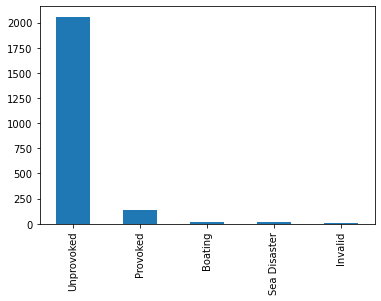

In [35]:
data.Type.value_counts().plot.bar();

### Country

In [36]:
country_lst=data.Country.unique()
country_lst.sort()
country_lst

array(['AMERICAN SAMOA', 'ANDAMAN / NICOBAR ISLANDAS', 'ARGENTINA',
       'AUSTRALIA', 'BAHAMAS', 'BARBADOS', 'BERMUDA', 'BRAZIL',
       'BRITISH WEST INDIES', 'CHILE', 'COLUMBIA', 'COSTA RICA',
       'CROATIA', 'CUBA', 'DOMINICAN REPUBLIC', 'ECUADOR', 'EGYPT',
       'EGYPT ', 'EL SALVADOR', 'ENGLAND',
       'FEDERATED STATES OF MICRONESIA', 'FIJI', 'FRANCE',
       'FRENCH POLYNESIA', 'Fiji', 'GRAND CAYMAN', 'GREECE', 'GRENADA',
       'GUAM', 'GUINEA', 'HONG KONG', 'INDIA', 'INDONESIA', 'IRAQ',
       'ISRAEL', 'ITALY', 'JAMAICA', 'JAPAN', 'KENYA', 'MADAGASCAR',
       'MALDIVES', 'MARSHALL ISLANDS', 'MEXICO', 'MICRONESIA',
       'MID ATLANTIC OCEAN', 'MOZAMBIQUE', 'NEW BRITAIN', 'NEW CALEDONIA',
       'NEW ZEALAND', 'NICARAGUA', 'NORTH ATLANTIC OCEAN ',
       'NORTH PACIFIC OCEAN', 'OKINAWA', 'PACIFIC OCEAN',
       'PACIFIC OCEAN ', 'PALAU', 'PALESTINIAN TERRITORIES', 'PANAMA',
       'PAPUA NEW GUINEA', 'PHILIPPINES', 'PUERTO RICO', 'REUNION',
       'RUSSIA', 'SAMOA', 'SC

In [37]:
data[data['Country']=='NORTH ATLANTIC OCEAN ']

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex_,Age,Injury,Fatal_YON,Time,Species_,Investigator_or_Source,pdf,href_formula,href,Case_Number_1,Case_Number_2,original_order,Unnamed_22,Unnamed_23
4288,1955.08.00.c,Aug-1955,1955.0,Unprovoked,NORTH ATLANTIC OCEAN,Open sea,unknown,Treading water,Wolfgang Emrich,M,15,No injury,N,Early afternoon,unknown,"H.D.Baldridge (1994), SAF Case #1489",1955.08.00.c-NV-Emrich.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1955.08.00.c,1955.08.00.c,2015.0,0,0


In [38]:
data.Country.replace(['EGYPT ','Fiji','GUINEA','UNITED ARAB EMIRATES (UAE)'],['EGYPT','FIJI','PAPUA NEW GUINEA','UNITED ARAB EMIRATES'],inplace=True)


### Area

In [39]:
data.Area.unique()

array(['California', 'Georgia', 'Hawaii', 'Pernambuco', 'Florida',
       'Queensland', 'South Carolina', 'Cornwall', 'Cocos Island',
       'Western Australia', 'Alifu Alifu Atoll', 'Western Cape Province',
       'unknown', 'Eastern Cape Province', 'Victoria', 'New South Wales',
       'Fernando de Noronha', 'Holquin Province', 'South Australia',
       'Shizuoka Prefecture', 'Massachusetts', 'Ascension Island',
       'Ibiza Island', 'New Providence ', 'Sharjah, ',
       'Baja California Sur', 'Saint-Leu', 'South Island', 'Saint-Andre',
       'Bali', 'Oregon', 'North Province', 'Alicante Province',
       'Kochi Prefecture', 'North Carolina', 'Isla Provedencia', 'Texas',
       'Suez', 'North Island', 'Tuamotos', 'Grand Terre', 'Vanua Levu',
       'South Province', 'Galapagos Islands', 'Inhambane Province',
       'Phuket', 'Tasmania', 'Le Port', 'Rangiroa',
       'Saint-Gilles-les-Bains', 'Bora Bora', 'Sinaloa', 'd’Étang-Salé',
       'Abaco Islands', 'Alabama', 'Louisiana', 'D

### Location

In [40]:
data.Location.unique()

array(['Oceanside, San Diego County', 'St. Simon Island, Glynn County',
       'Habush, Oahu', ..., 'Macleay River', 'Colombo', 'Carlisle Bay'],
      dtype=object)

### Activity

In [41]:
data.Activity.unique()

array(['Paddling', 'Standing', 'Surfing', 'Swimming', 'Walking',
       'Feeding sharks', 'Fishing', 'Scuba diving', 'Paddle-skiing',
       'Stand-Up Paddleboarding', 'Wading', 'Kayak fishing for sharks',
       'unknown', 'Spearfishing', 'Night bathing', 'Surfing ',
       'Kayaking / Fishing', 'Snorkeling', 'SUP', 'Skimboarding',
       'Kayaking', 'Body boarding', 'Paddle boarding', 'Kakaying',
       'Scuba Diving', 'Surf skiing ', 'Free diving', 'Surf fishing',
       'Floating', 'Surfng', 'Kite surfing', 'Boogie boarding',
       'SUP Foil boarding', 'Floating in tube', 'Diving',
       'Teasing a shark', 'Body surfing', 'Diving for beche-de-mer',
       'Windsurfing', 'Swimming / Wading', 'Photographing fish',
       'Kayak Fishing', 'Surf-skiing', 'Scallop diving on hookah',
       'Body boarding ', 'Playing in the water', 'Body Boarding',
       'Body surfing?', 'Playing', 'Standing / Snorkeling',
       'Hand feeding sharks', 'Rowing', 'Shark fishing', 'Fishing ',
       'Ka

### Name

In [42]:
data.Name.unique()

array(['Julie Wolfe', 'Adyson\xa0McNeely ', 'John Denges', ...,
       'Alfred Australia Howe', 'William May',
       'Samuel Jennings, a deserter from the British frigate Milford'],
      dtype=object)

### Sex

In [43]:
data.Sex_.unique()

array(['F', 'M', 'M ', 'lli'], dtype=object)

In [44]:
data[data['Sex_']=='lli']

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex_,Age,Injury,Fatal_YON,Time,Species_,Investigator_or_Source,pdf,href_formula,href,Case_Number_1,Case_Number_2,original_order,Unnamed_22,Unnamed_23
1624,2004.11.11.b,11-11-2004,2004.0,Unprovoked,USA,California,"Bunkers, Humboldt Bay, Eureka, Humboldt County",Surfing,Brian Kang,lli,38,"Lacerations to hand, knee & thigh",N,13h30,5.5 m [18'] white shark,"R. Collier, GSAF",2004.11.11.b-Kang.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2004.11.11.b,2004.11.11.b,4679.0,0,0


In [45]:
data.Sex_.replace(['M ','lli'],['M','M'],inplace=True)

In [46]:
data.Sex_.unique()

array(['F', 'M'], dtype=object)

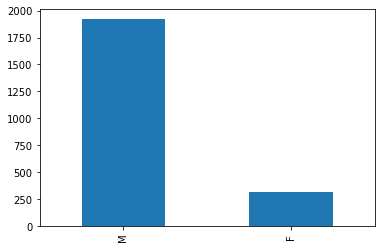

In [47]:
data.Sex_.value_counts().plot.bar();

### Age

In [48]:
data.Age.unique()

array(['57', '11', '48', '18', '15', '12', '32', '10', '21', '30', '60',
       '33', '37', '19', '25', '69', '55', '34', '35', '40s', '20', '54',
       '14', '22', '31', '17', '40', '28', '42', '3', '13', '50', '46',
       '82', '41', '20s', '51', '39', '58', '26', 'Teen', '47', '16',
       '61', '65', '73', '36', '66', '29', '43', '60s', '49', '9', '59',
       '6', '64', '23', '52', '24', '45', '71', '44', '7', '27', '62',
       '38', '68', '63', '70', '53', '8', 'teen', '77', '74', '56', '30s',
       '5', '86', '18 or 20', '12 or 13', '84', '\xa0 ', ' ', '30 or 36',
       '6½', '33 or 37', 'mid-30s', ' 30', ' 28', '20?', "60's", '75',
       '21 or 26', '20 ', '>50', '(adult)', '25 or 28', '30 & 32',
       '13 or 18', '33 & 26', '7 or 8', 'F', '9 or 10', '  ', '31 or 33'],
      dtype=object)

In [49]:
data.Age.replace(['40s','Teen','60s','teen','30s','18 or 20','12 or 13','\xa0 ',' '],['45','15','65','15','35','18','12','25', '25'],inplace=True)
data.Age.replace(['30 or 36', '6½','33 or 37', 'mid-30s','20?',"60's"],['30','6','33','35','25','65'],inplace=True)
data.Age.replace(['21 or 26','>50','(adult)','25 or 28','30 & 32','13 or 18','33 & 26','7 or 8','F','9 or 10', '  ','31 or 33'],['21','50','45','25','30','13','33','7','25','9','25', '31'],inplace=True)
data.Age.replace('20 ','20',inplace=True)
data.Age.replace('20s','20',inplace=True)
data.Age.replace([' 30' , ' 28' ],['30','28'],inplace=True)
data.Age.unique()

array(['57', '11', '48', '18', '15', '12', '32', '10', '21', '30', '60',
       '33', '37', '19', '25', '69', '55', '34', '35', '45', '20', '54',
       '14', '22', '31', '17', '40', '28', '42', '3', '13', '50', '46',
       '82', '41', '51', '39', '58', '26', '47', '16', '61', '65', '73',
       '36', '66', '29', '43', '49', '9', '59', '6', '64', '23', '52',
       '24', '71', '44', '7', '27', '62', '38', '68', '63', '70', '53',
       '8', '77', '74', '56', '5', '86', '84', '75'], dtype=object)

In [50]:
data.Age=data.Age.astype(int)
data.Age.unique()

array([57, 11, 48, 18, 15, 12, 32, 10, 21, 30, 60, 33, 37, 19, 25, 69, 55,
       34, 35, 45, 20, 54, 14, 22, 31, 17, 40, 28, 42,  3, 13, 50, 46, 82,
       41, 51, 39, 58, 26, 47, 16, 61, 65, 73, 36, 66, 29, 43, 49,  9, 59,
        6, 64, 23, 52, 24, 71, 44,  7, 27, 62, 38, 68, 63, 70, 53,  8, 77,
       74, 56,  5, 86, 84, 75])

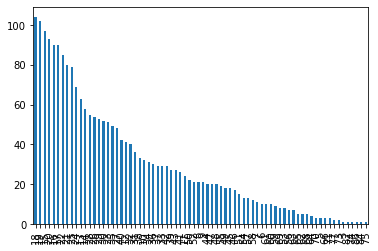

In [51]:
data.Age.value_counts().plot.bar();

### Injury

In [52]:
data.Injury.unique()

array(['No injury to occupant, outrigger canoe and paddle damaged',
       'Minor injury to left thigh',
       'Injury to left lower leg from surfboard skeg', ...,
       'Right thigh and left foot severely bitten',
       'FATAL     Injured by shark, died of tetanus',
       'Hand and foot severely bitten, surgically amputated'],
      dtype=object)

### Fatal

In [53]:
data.Fatal_YON.unique()

array(['N', 'Y', 'M', '2017', 'UNKNOWN', ' N'], dtype=object)

In [54]:
data.Fatal_YON.replace(['M','2017',' N'],['N','UNKNOWN','N'],inplace=True)

In [55]:
data.Fatal_YON.unique()

array(['N', 'Y', 'UNKNOWN'], dtype=object)

In [56]:
data[data['Fatal_YON']=='UNKNOWN']

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex_,Age,Injury,Fatal_YON,Time,Species_,Investigator_or_Source,pdf,href_formula,href,Case_Number_1,Case_Number_2,original_order,Unnamed_22,Unnamed_23
786,2012.06.10,10-06-2012,2012.0,Provoked,ITALY,Sardinia,Muravera,Attempting to rescue an injured & beached shark,Giorgio Zara,M,57,Lower left leg injured PROVOKED ACCIDENT,UNKNOWN,Morning,"Blue shark, 2.5m","D. Puddo, 6/11/2012",2012.06.10-Zara.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.06.10,2012.06.10,5517.0,0,0
2267,1996.12.29,29-12-1996,1996.0,Unprovoked,AUSTRALIA,Queensland,Coolum Beach,Surfing,Blair Hall,M,18,unknown,UNKNOWN,18h00,unknown,"The Advertiser, 12/30/1996, p.3",1996.12.29-BlairHall.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1996.12.29,1996.12.29,4036.0,0,0
3429,1969.06.27,27-06-1969,1969.0,Unprovoked,USA,Florida,Florida Keys,Wading,Steven Benham,M,22,No details,UNKNOWN,1600,unknown,H.D.Baldridge (1994) SAF Case #1652,1969.06.27-NV-Benham.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1969.06.27,1969.06.27,2874.0,0,0
3434,1969.05.22,22-05-1969,1969.0,Unprovoked,DOMINICAN REPUBLIC,unknown,unknown,Surfing,"Douglas Kuchn, Jr.",M,18,unknown,UNKNOWN,16h00,unknown,H.D.Baldridge (1994) SAF Case #1607,1969.05.22-NV-Kuchn.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1969.05.22,1969.05.22,2869.0,0,0


In [57]:
data.drop(index=(data[data['Fatal_YON']=='UNKNOWN'].index),inplace=True)

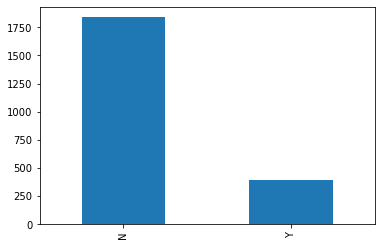

In [58]:
data.Fatal_YON.value_counts().plot.bar();


### Time

In [59]:
data.Time.unique()

array(['18h00', '14h00  -15h00', '07h45', 'Late afternoon', '17h00',
       '14h00', 'Morning', '15h00', '08h15', '10h40', '09h30', '21h50',
       '09h40', '08h00', '17h35', '15h30', '07h30', '19h00, Dusk',
       'Night', '16h00', '12h00', '13h45', '23h30', '09h00', 'Afternoon',
       '18h30', '12h30', '16h30', '18h45', '06h00', '10h00', '10h44',
       '10h30', '13h19', '13h30', '11h20', '08h30',
       'Shortly before 12h00', '17h10', '11h00', '11h15', '17h45',
       '13h00', '10h20', '13h20', '07h00', '02h00', '09h50', '11h30',
       '17h30', '9h00', '10h43', 'After noon', '15h15', '14h30', '15h40',
       '19h05', '1300', '14h30 / 15h30', '22h00', '16h20', '14h34',
       '15h25', '15h45', '17h46', 'Morning ', '15h49', '10h45', '19h00',
       '10h15', '18h15', '04h00', '14h50', '13h50', '10h25', '16h50',
       '16h45', '15h52', '06h15', '14h40', '08h45', 'Evening', '12h10',
       '18h05', '11h41', '12h25', '17h51', '16h12', '12h45', '10h50',
       '14h15', '09h45', '11h45'

### Species

In [60]:
data.Species_.unique()

array(['White shark', 'unknown', 'Tiger shark', "Bull shark, 6'",
       'Grey reef shark', 'Invalid incident', '3 m shark',
       'White shark, 2.5 m', 'Bull shark', "Tiger shark, 12'",
       'Wobbegong shark', '3.5 m shark', '1.8 m shark',
       'Juvenile white shark,  2.7 to 3.2 m', 'Bull shark, 2 m',
       'Bull shark, 3 m ', 'small shark', 'White shark, 4.6 m',
       '2 m shark', 'Wobbegong shark, 1 m', 'White shark, 4.5 m',
       'Tiger shark, 8 to 10 feet', "8' shark", "5' to 6' shark",
       'White shark, 3 to 3.5m ', 'White shark, 3 m',
       "White shark, 5' to 7'", 'Possibly a juvenile blacktip shark',
       "4' shark", '"A small shark"', "White shark, 11' to 13'",
       "White shark, 8' to 10'", "Bull shark, 4' to 5'", 'Bull shark, 2m',
       'White shark, 4 m', "Bull shark, 5' to 7'", 'Bull shark, 4 m',
       'Bull shark, 1 m', 'Wobbegong shark, 2m',
       'Broadnose sevengill shark, 1.5 m', " 6' to 8' shark",
       'White shark, 3.5 m', "3' to 4' shark", "Ti

### Investigator

In [61]:
data.Investigator_or_Source.unique()

array(['R. Collier, GSAF', 'K.McMurray, TrackingSharks.com',
       'Diario de Pernambuco, 6/4/2018', ...,
       'Gazette (Sydney) 1/31/1837; Proc. Royal Aust. Hist. Scty, I, Part 2, 1924; G.P. Whitley, p.14; Sharpe, p. 87',
       'Edinburgh Advertiser. 11/4/1817; R. DeSilva',
       'W.R.Cutter, Vol.1, p.252'], dtype=object)

### pdf

In [62]:
data.pdf.unique()

array(['2018.06.25-Wolfe.pdf', '2018.06.18-McNeely.pdf',
       '2018.06.09-Denges.pdf', ..., '1837.01.17-Howe.pdf',
       '1817.05.11-May.pdf', '1703.03.26-Jennings.pdf'], dtype=object)

### Href formula

In [63]:
data.href_formula.unique()

array(['http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf',
       'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.18-McNeely.pdf',
       'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.09-Denges.pdf',
       ...,
       'http://sharkattackfile.net/spreadsheets/pdf_directory/1837.01.17-Howe.pdf',
       'http://sharkattackfile.net/spreadsheets/pdf_directory/1817.05.11-May.pdf',
       'http://sharkattackfile.net/spreadsheets/pdf_directory/1703.03.26-Jennings.pdf'],
      dtype=object)

### Href

In [64]:
data.href.unique()

array(['http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf',
       'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.18-McNeely.pdf',
       'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.09-Denges.pdf',
       ...,
       'http://sharkattackfile.net/spreadsheets/pdf_directory/1837.01.17-Howe.pdf',
       'http://sharkattackfile.net/spreadsheets/pdf_directory/1817.05.11-May.pdf',
       'http://sharkattackfile.net/spreadsheets/pdf_directory/1703.03.26-Jennings.pdf'],
      dtype=object)

### Case_Number1

In [65]:
data.Case_Number_1.unique()

array(['2018.06.25', '2018.06.18', '2018.06.09', ..., '1837.01.17',
       '1817.05.11', '1703.03.26'], dtype=object)

### Case_Number2

In [66]:
data.Case_Number_2.unique()

array(['2018.06.25', '2018.06.18', '2018.06.09', ..., '1837.01.17',
       '1817.05.11', '1703.03.26'], dtype=object)

### Original order

In [67]:
data.original_order.unique()

array([6303., 6302., 6301., ...,  226.,  189.,  143.])

### Unnamed 22

In [68]:
data.Unnamed_22.unique()

array([0], dtype=int64)

In [69]:
data.rename({'Unnamed_22':'teen_or_less'},axis=1,inplace=True)

### Unnamed 23

In [70]:
data.Unnamed_23.unique()

array([0], dtype=int64)

In [71]:
data.rename({'Unnamed_23':'adult'},axis=1,inplace=True)